# Introduction to Mathematical Optimization

#### Md Shahidullah Kawsar, Data Scientist, IDARE, Houston, TX.

This notebook introduces optimization, its core components, and its wide applications across industries and domains. It presents a quick, exhaustive search method for solving an optimization problem. It provides a mathematical primer for the concepts required for the advanced optimization techniques.

Mathematical optimization is used to find the ideal inputs for a specific problem using math. These problems can be found in many industries. For example:
1. A t-shirt company wants to minimize manufacturing costs for their business.
2. A car company wants to make its production lines faster.
3. Optimal distribution routes based on distance and traffic
4. Improve delivery times and reduce costs


#### Applying an objective function
A media company is faced with the problem of minimizing the cost to print and distribute magazines. I want to find the optimal number of magazines to publish and print for the smallest cost. The costs associated with a number of magazines printed is calculated using the following equation: P = 40q - 0.5q^2. Here, P is profit and q is the quantity of magazines. 

In [115]:
import numpy as np
import matplotlib.pyplot as plt

from sympy import symbols, diff, solve

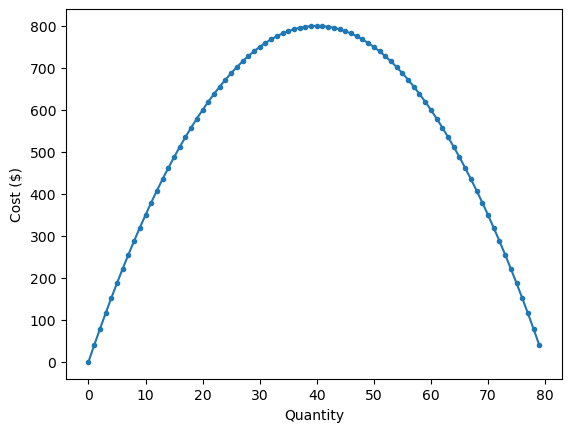

In [116]:
# Create a numpy array ranging from 0 to 80; this represents the number of magazines printed.
quantity = np.arange(80)

# Define a profit() function that computes the profit for a given quantity, q, using the equation: 40q - 0.5q^2.
def profit(q): 
  return 40 * q - 0.5 * q**2

# Plot the cost, using the profit() function, to see where the maximum is.
plt.plot(quantity, profit(quantity), marker=".")
plt.xlabel('Quantity')
plt.ylabel('Cost ($)')
plt.show()


From the plot, the highest cost of $800 achieved with 40 magazines.

#### Exhaustive search method
I've applied the objective function and visualized the result; however, we could only eye-ball the optimal value by reviewing the plot. A more precise way of finding this value is with the exhaustive search method. Exhaustive search is a Brute force method, and calculating the profit for a range of quantities. How to maximize profit? Select the quantity that produces the largest profit.

In [117]:
# Calculate the profit for every quantity using the profit function, saving to profits.
profits = profit(quantity)

# Find the maximum profit with the appropriate array method, saving to max_profit.
max_profit = profits.max()

# Find the optimal quantity to maximize profit by saving the index of the maximum profit as max_index, then using this to subset quantity.
max_profit_ind = np.argmax(profits)
optimal_quantity = quantity[max_profit_ind]

# Print the results by completing the f-string, remembering to multiply the profit and quantity by 1000.
print(f"Need to print {optimal_quantity} magazines to make the maximum profit of ${max_profit}.")


Need to print 40 magazines to make the maximum profit of $800.0.


#### The advantages of Exhaustive search:
- Simple implementation
- No need for expensive software
- Minimal assumptions

#### Disadvantages of Exhaustive search:
- Will not scale for complex cases

#### Univariate Optimization:
Univariate means the objective function has only one variable. Slope of the objective function changes with the changes to single variable.

Finding the first derivative: For some objective functions, the optimum can be found using calculus by finding the derivative of the function. sympy offers a solution to avoid manually calculating these derivatives. Suppose you work in a firm that produces toy bicycles. You have the following objective function to calculate your costs, C, which is dependent on the variable, q, the quantity of bicycles produced: C = 2000 - q^2 + 120q

To find the optimum value of q, you'll find the derivative of the cost with respect to the quantity, dC/dq, using sympy.

Critical point: Optimum is found where the derivative function equals zero.

Find the second derivative: Now that we have the derivative of the objective function, we can calculate the second order derivative using sympy. The second derivate can identify the maxima or minima.
- If 2nd derivative at the point < 0: Maxima
- If 2nd derivative at the point > 0: Minima
- If 2nd derivative at point = 0: neither

In [118]:
# Create a sympy symbol, q, that represents the quantity of bicycles produced.
q = symbols('q')
c = 2000 - q**2 + 120 * q

# Find the derivative of the objective function c with respect to q, dc_dq, using sympy.
dc_dq = diff(c)
print(f"The derivative is {dc_dq}.")

# Solve the derivative to find the optimum price.
q_opt = solve(dc_dq)[0]
print(f"Optimum quantity: {q_opt}")

# Find the second derivative
d2c_dq2 = diff(dc_dq)

# Substitute the optimum into the second derivative
sol = d2c_dq2.subs('q', q_opt)
print(f"The second derivative at quantity {q_opt} is: {sol}")

The derivative is 120 - 2*q.
Optimum quantity: 60
The second derivative at quantity 60 is: -2


#### Multivariate Optimization
Multivariate means the objective function has more than one variable.

#### Example 1:
F = K^0.34 * L^0.66
<br>F: production function
<br>Labor (L): hours put in by workers
<br>Capital (K): hours machines operated

In [119]:
# Example 1
# Define symbols K, L
K, L = symbols('K L')

F = K**.34 * L**.66

# Derive the partial derivatives
dF_dK = diff(F, K)
dF_dL = diff(F, L)
	
# Solve the equations
critical_point = solve([dF_dK, dF_dL], (K, L))
print(critical_point)

[]


No maxima or minima!

#### Example 2: 
An economist working for an automotive company. The manager has modeled the production process as a function of the number of machines and the number of workers to produce F = -3K^2 + 100K - 0.5L^2 + 100L cars. This is the multivariate objective function. We'll need to use partial derivatives to optimize this function.

In [128]:
# Define symbols K, L
K, L = symbols('K L')

F = -3*K**2 + 100*K - (1/2)*L**2 + 100*L

# Derive the partial derivatives
dF_dK = diff(F, K)
dF_dL = diff(F, L)
	
# Solve the equations
critical_point = solve([dF_dK, dF_dL], (K, L))
print(critical_point)

{K: 16.6666666666667, L: 100.000000000000}


Found a critical point at K of 16hrs 40min and an L of 100hrs. This could be the function's optimum!